In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

In [3]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os

In [4]:
df=pd.read_csv('../data/loan_approval_dataset.csv')
df.rename(columns=lambda x : x.strip(),inplace=True)
loan_counts = pd.DataFrame(df.loan_status.value_counts())
loan_counts

,count
loan_status,
Approved,2656
Rejected,1613


### Kiểm tra đánh giá mất cân bằng dữ liệu

/tmp/ipykernel_2143/983642767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "loan_status", y="count",data=loan_counts, palette="cividis")


Text(0.5, 0, 'Giá trị của loan Status')

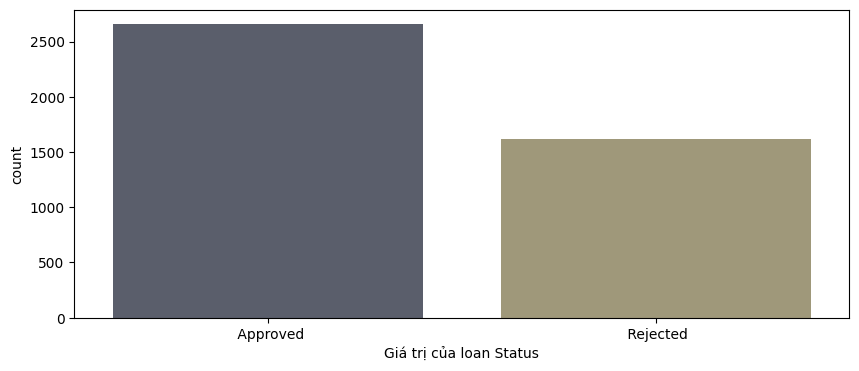

In [5]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10,4))
sns.barplot(x= "loan_status", y="count",data=loan_counts, palette="cividis")
plt.xlabel('Giá trị của loan Status')


* Kiểm tra giá trị NULL trong các bảng


In [6]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

* Kiểm tra kiểu giá trị đối với từng cột

In [7]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [8]:
df.drop(columns=['loan_id'], inplace=True)

In [9]:
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


### Xóa khoảng trắng trong dataframe


In [10]:
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

/tmp/ipykernel_2143/3794008493.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


* Xóa khoảng trắng tại mỗi tên cột 

In [11]:
# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


### Mã hóa dữ liệu sử dụng LabelEncoder

In [12]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [13]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Apply label encoding to the 'education' column
# df['education'] = label_encoder.fit_transform(df['education'])

# # Apply label encoding to the 'self_employed' column
# df['self_employed'] = label_encoder.fit_transform(df['self_employed'])

# # Apply label encoding to the 'loan_status' column
# df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

# # Display the updated DataFrame with encoded columns
# print(df[['education', 'self_employed','loan_status']])



# Tạo label cho các giá trị cần gán nhãn

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cat_colums = ['education', 'self_employed']
mapping_dict = {}
for i in cat_colums:
    label_encoder.fit(df[i])
    classes = label_encoder.classes_
    print(f'classes: {classes}')
    encoded = label_encoder.transform(classes)
    print(f'encoded: {encoded}')
    df[i] = label_encoder.fit_transform(df[i])

    mapping = [{cls : enc} for cls, enc in zip(classes,encoded)]
    # mapping = list(dict(zip(classes,encoded)))
    # print(dict(zip(classes,encoded)))
    mapping_dict[i] = mapping

df.loan_status = df.loan_status.map({
    'Approved': 1,
    'Rejected':0
})

print(mapping_dict)


classes: ['Graduate' 'Not Graduate']
encoded: [0 1]
classes: ['No' 'Yes']
encoded: [0 1]
{'education': [{'Graduate': np.int64(0)}, {'Not Graduate': np.int64(1)}], 'self_employed': [{'No': np.int64(0)}, {'Yes': np.int64(1)}]}


In [14]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [15]:
df.dtypes

no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

In [16]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


## Standardize Data

In [18]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#                       'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
#                       'bank_asset_value']

# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## Đánh giá tính tương quan của dữ liệu

#### Biểu đồ boxplot đánh giá tương quan của từng biến numberical - biến category

Vì biến loan_status là biến binary variable, nên để kiểm tra tính tương quan đối với các biến numerical variable sẽ nên sử dụng các biểu đồ sau đây: 

* Boxplot : SO sánh, phân phối giá trị của biến số giữa các nhóm phân loại  - phát hiện outlier sự khác biệt về trung vị
* Violin Plot: Kết hợp phân bố và boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

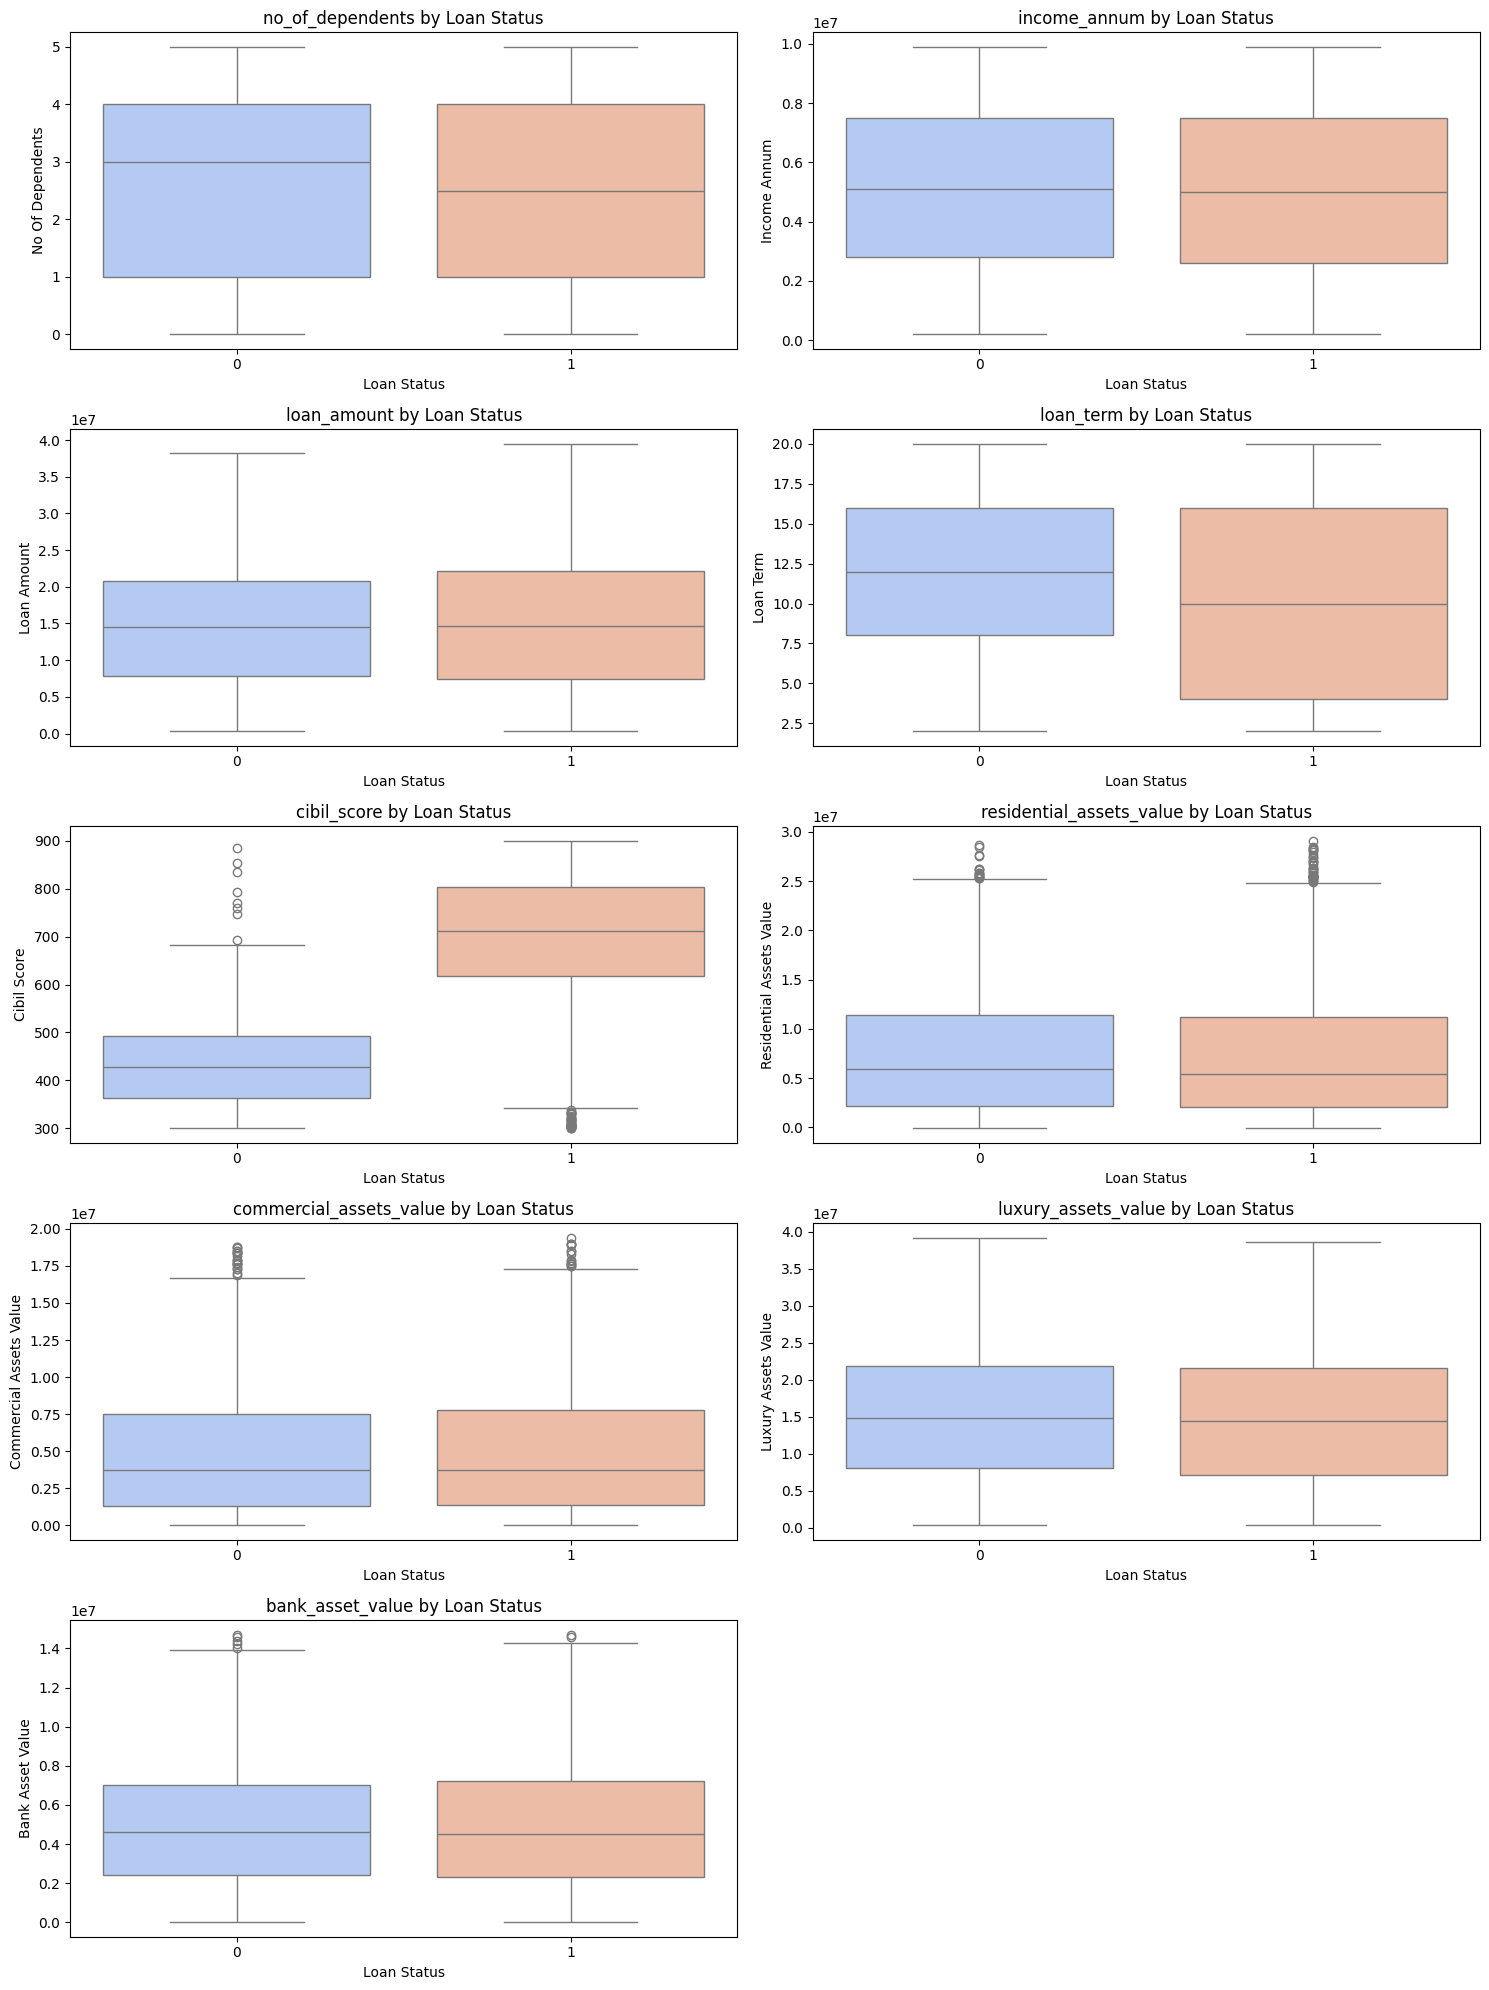

In [19]:
numeric_col = list(df.columns)
numeric_col.remove('education')
numeric_col.remove('self_employed')
numeric_col.remove('loan_status')
numeric_col


plt.figure(figsize=(15,20))
for i,col in enumerate(numeric_col,1):
    plt.subplot(5,2,i)
    sns.boxplot(x='loan_status',hue='loan_status', y=col, data=df,palette='coolwarm',legend=False)
    plt.title(f'{col} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col.replace('_',' ').title())
plt.tight_layout()
plt.show

### Biểu đồ Heatmap - Tìm các giá trị tương quan của bộ dữ liệu

* Chỉ đánh giá các biến dạng numerical - Không đánh giá với biến loan_status
* Chỉ sử dụng để đánh giá, và chọn các đặc trưng đầu vào tránh đa cộng biến, và kiểm tra mối liên hệ phi tuyến tính

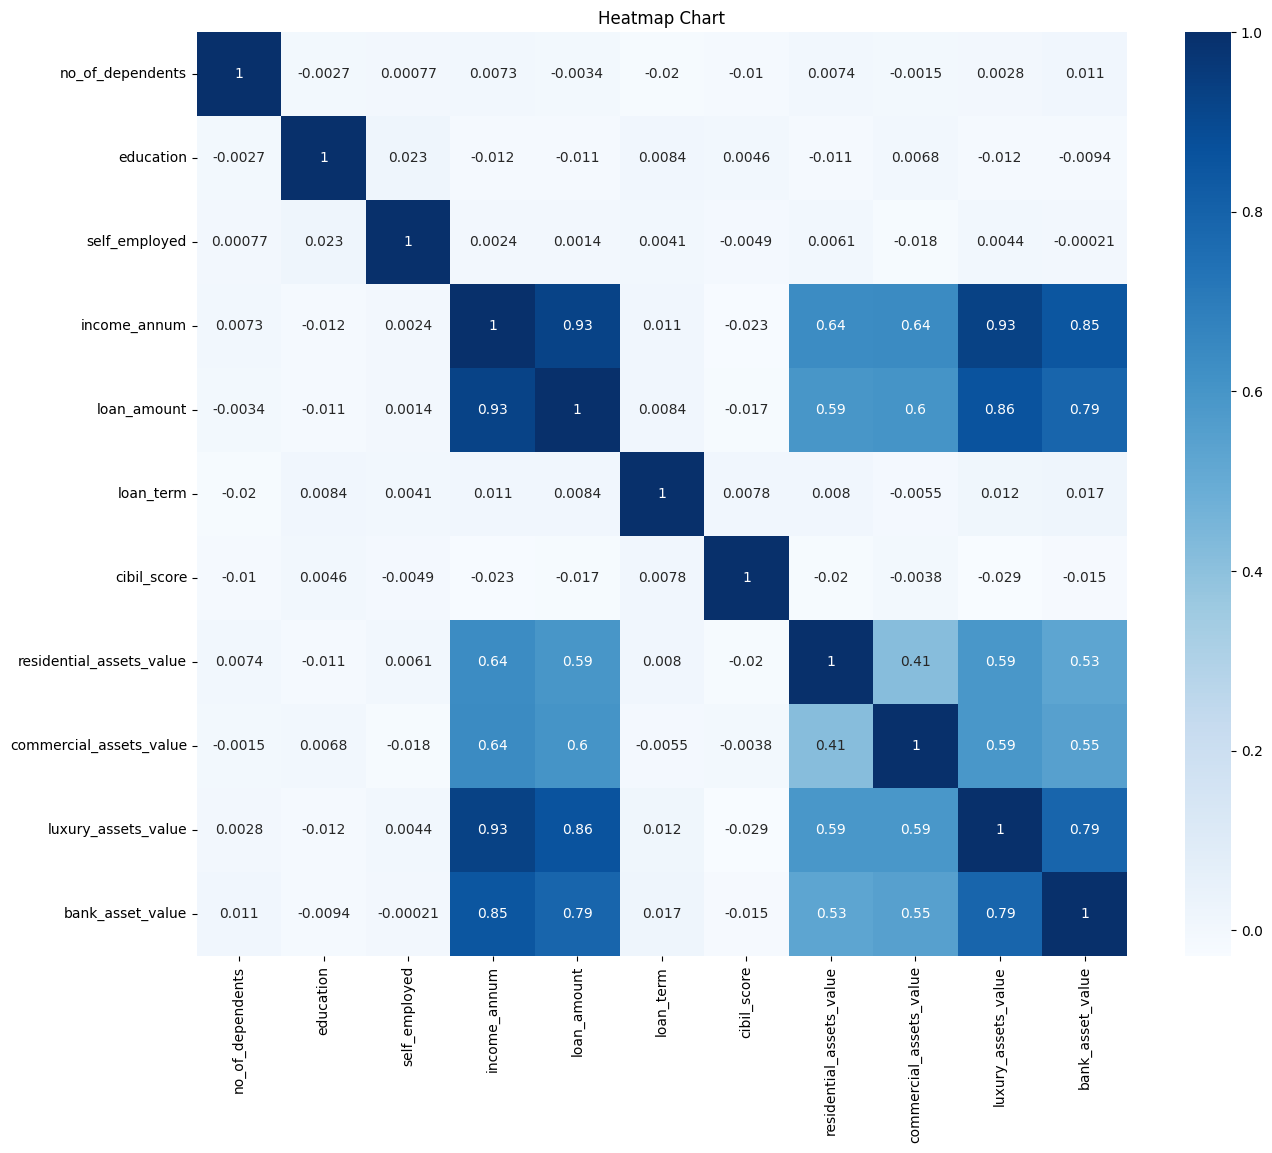

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kiểm tra các đặc trưng
df_corr = df.drop(['loan_status'],axis=1)
# Create Correlation 
corr = df_corr.corr()

# Make heatmap chart and Assessment of that

plt.figure(figsize=(15,12))
sns.heatmap(corr,cmap="Blues", annot=True)
plt.title('Heatmap Chart')
plt.show()

* Ta có thể thấy rằng, luxury_assets_value có tương quan dương với bank_asset_value cụ thể 0.79, đồng thời các trường residential_assets_value, commerical_assets_value cũng có tương quan mạnh đến nhau từ 0.41 - 0.59<br>
=> Multicollinearity - Đa cộng tuyến <br>

### Giải pháp: 

Thực hiện tạo biến Assets = TỔng các giá trị đa cộng tuyến


### Tạo các tập train và test

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
x = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns
y = df['loan_status']  # Target variable

# Select only the numerical columns for scaling (excluding 'loan_status')
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

# Tại sao lại chọn những cột này ? 
# Ứng dụng của chúng là gì ? Phải chỉ ra sự tương quan, giữa các chức năng 


# Apply scaling to the numerical columns
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

# Display the scaled feature variables (X) and the target variable (y)
print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())


Scaled Feature Variables (x):
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          0              0      1.617979     1.633052   
1         -1.473548          1              1     -0.341750    -0.324414   
2          0.295621          0              0      1.439822     1.610933   
3          0.295621          0              0      1.119139     1.721525   
4          1.475067          1              1      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_ass

In [22]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Đánh giá imbalance data 

/tmp/ipykernel_2143/3458567873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "loan_status", y="count",data=xx, palette="cividis")


loan_status
1    2120
0    1295
Name: count, dtype: int64

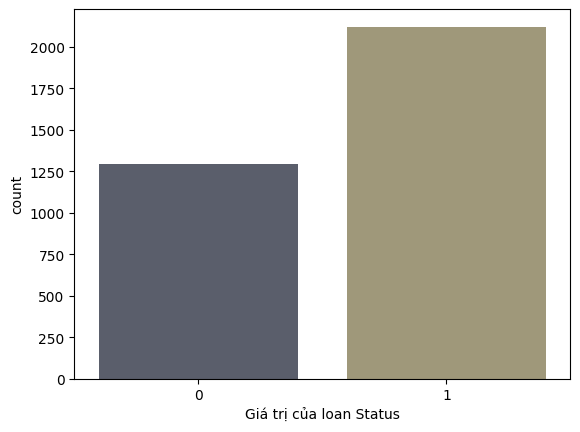

In [24]:

xx = y_train.value_counts().reset_index()
sns.barplot(x= "loan_status", y="count",data=xx, palette="cividis")
plt.xlabel('Giá trị của loan Status')
y_train.value_counts()


* ==> Tập dữ liệu mục tiêu không bị dấu hiệu imbalance data

In [25]:
y.value_counts()

count_class_0, count_class_1 = y.value_counts()
print(count_class_1)
print(count_class_0)

1613
2656


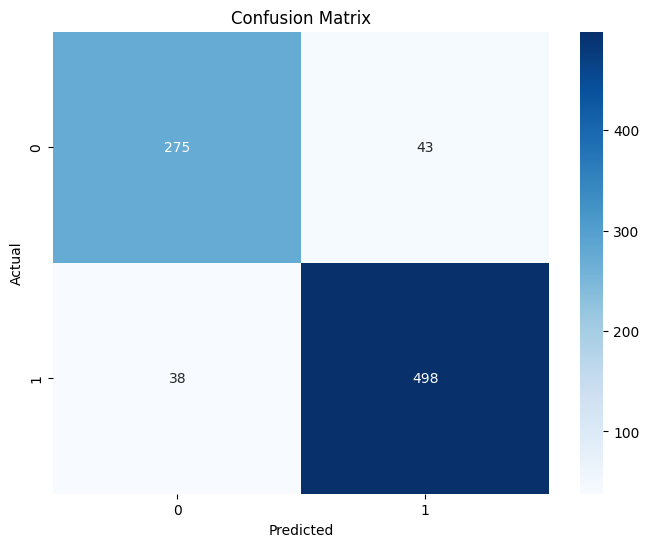

Accuracy: 0.905152224824356
Precision: 0.9049067721845864
Recall: 0.905152224824356
F1 Score: 0.9049966078550483
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


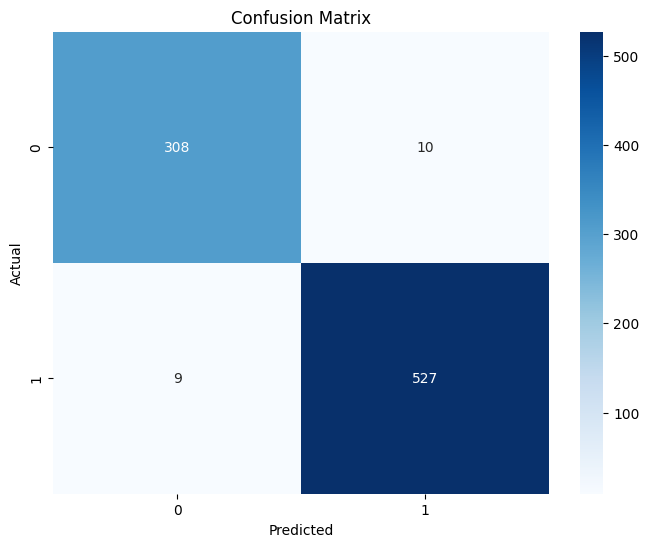

Decision Tree Classifier Metrics:
Accuracy: 0.977751756440281
Precision: 0.9777403171039073
Recall: 0.977751756440281
F1 Score: 0.9777446054465413
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

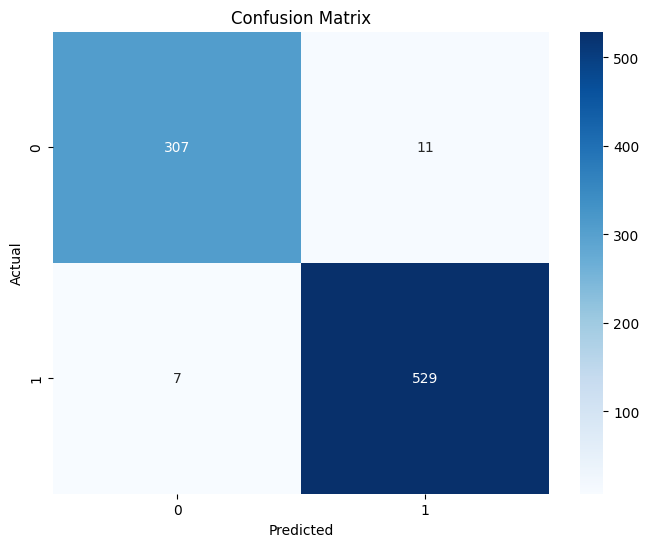

Random Forest Classifier Metrics:
Accuracy: 0.9789227166276346
Precision: 0.9789137113664627
Recall: 0.9789227166276346
F1 Score: 0.9788951934704381
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

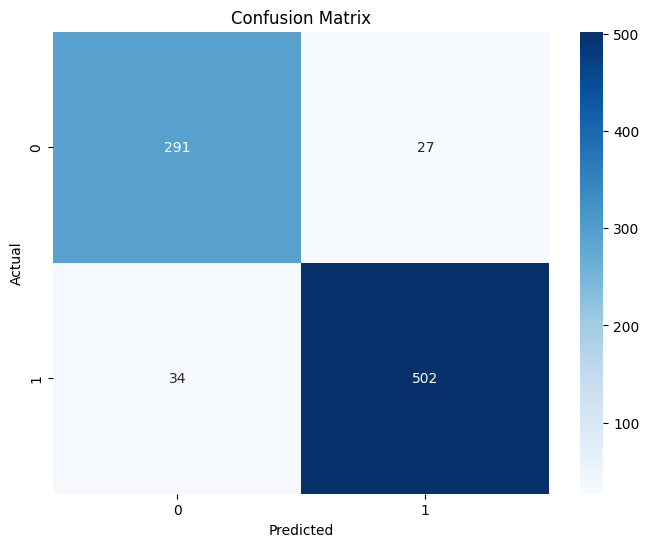

SVM Classifier Metrics:
Accuracy: 0.9285714285714286
Precision: 0.9290105735474354
Recall: 0.9285714285714286
F1 Score: 0.9287254892757268
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       318
           1       0.95      0.94      0.94       536

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.92       854
weighted avg       0.93      0.93      0.93       854



In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

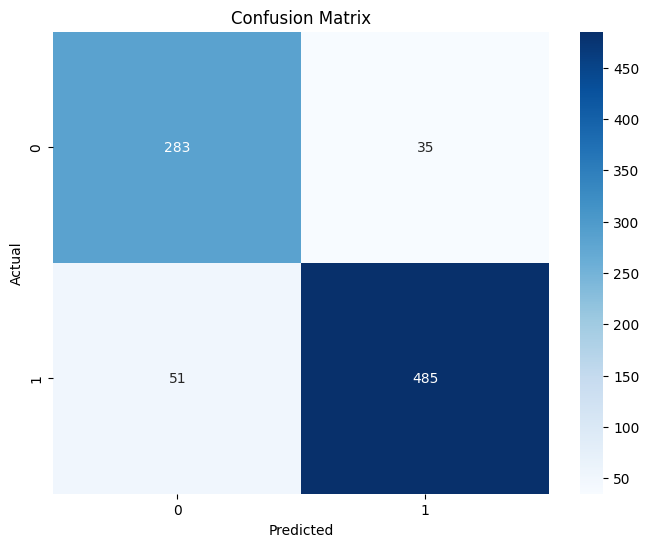

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.8992974238875878
Precision: 0.9008971788003887
Recall: 0.8992974238875878
F1 Score: 0.899770140014533
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       318
           1       0.93      0.90      0.92       536

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

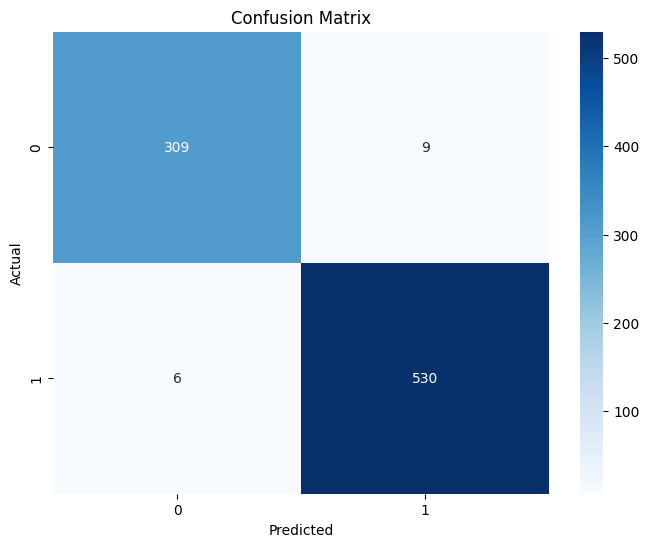

XGBoost Classifier Metrics:
Accuracy: 0.9824355971896955
Precision: 0.9824273418117514
Recall: 0.9824355971896955
F1 Score: 0.982418483851126
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

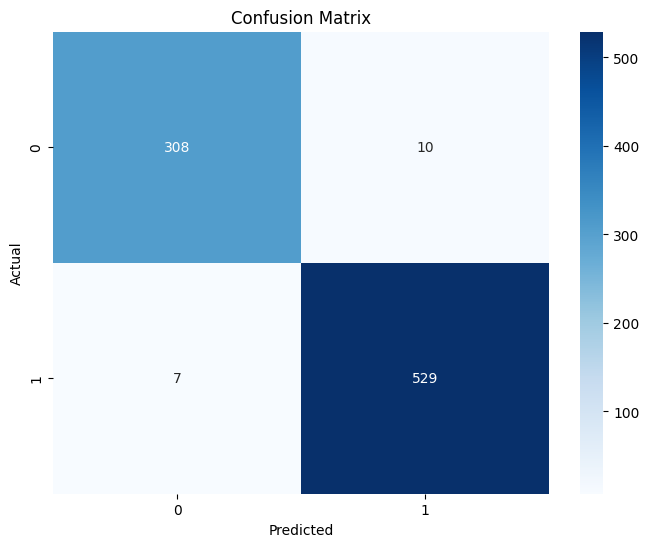

Ensemble Classifier Metrics:
Accuracy: 0.9800936768149883
Precision: 0.9800807868388998
Recall: 0.9800936768149883
F1 Score: 0.9800742816979428
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

# Đọc dữ liệu từ file CSV
data = pd.read_csv('../data/loan_approval_dataset.csv')

# Loại bỏ khoảng trắng trong tên cột
data.columns = data.columns.str.strip()

# Chọn các cột số
numeric_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                   'cibil_score', 'residential_assets_value', 'commercial_assets_value', 
                   'luxury_assets_value', 'bank_asset_value']
numeric_data = data[numeric_columns]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Vẽ biểu đồ hộp (boxplot) trước và sau chuẩn hóa
plt.figure(figsize=(15, 10))

# Trước chuẩn hóa
plt.subplot(2, 1, 1)
sns.boxplot(data=numeric_data)
plt.title('Phân phối các đặc trưng trước khi chuẩn hóa', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Giá trị')

# Sau chuẩn hóa
plt.subplot(2, 1, 2)
sns.boxplot(data=scaled_df)
plt.title('Phân phối các đặc trưng sau khi chuẩn hóa', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Giá trị chuẩn hóa')

plt.tight_layout()
plt.savefig('standardization_boxplot.png')
plt.close()

# Vẽ biểu đồ mật độ (density plot) cho một số đặc trưng
plt.figure(figsize=(15, 5))

# Chọn một số đặc trưng để minh họa
selected_features = ['income_annum', 'cibil_score', 'loan_amount']

# Trước chuẩn hóa
plt.subplot(1, 2, 1)
for feature in selected_features:
    sns.kdeplot(data=numeric_data[feature], label=feature)
plt.title('Mật độ phân phối trước khi chuẩn hóa', fontsize=14)
plt.xlabel('Giá trị')
plt.legend()

# Sau chuẩn hóa
plt.subplot(1, 2, 2)
for feature in selected_features:
    sns.kdeplot(data=scaled_df[feature], label=feature)
plt.title('Mật độ phân phối sau khi chuẩn hóa', fontsize=14)
plt.xlabel('Giá trị chuẩn hóa')
plt.legend()

plt.tight_layout()
plt.savefig('standardization_density.png')
plt.close()

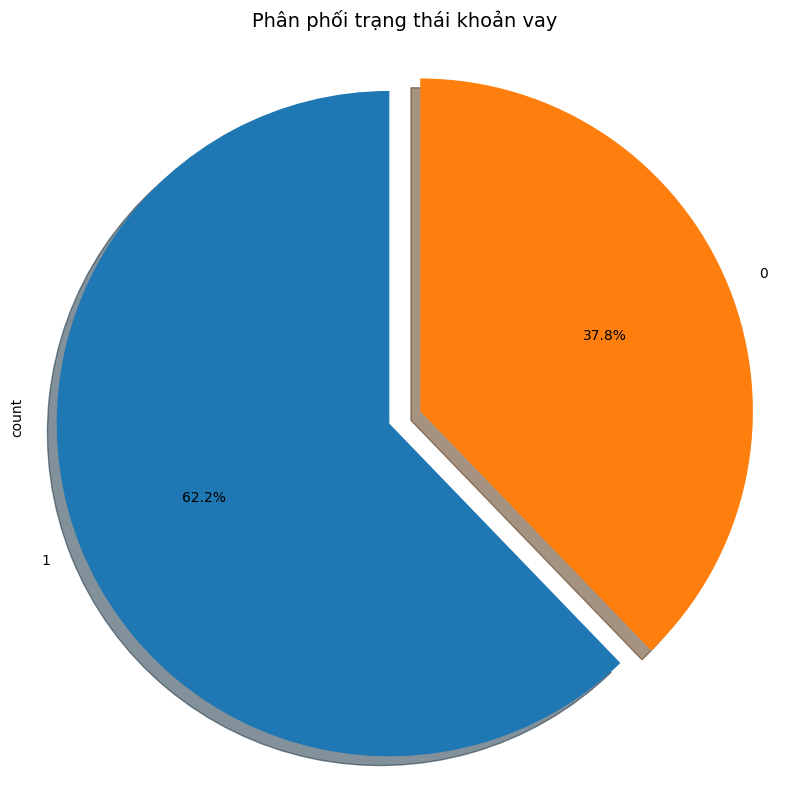

In [34]:
import matplotlib.pyplot as plt

# Đếm số lượng các giá trị trong cột loan_status
status_counts = df['loan_status'].value_counts()

# Tạo biểu đồ pie
fig1, ax1 = plt.subplots(figsize=(8, 8))  # Thêm kích thước figure

status_counts.plot.pie(
    autopct='%1.1f%%',  # Định dạng hiển thị phần trăm (1 số thập phân)
    startangle=90,      # Góc bắt đầu
    ax=ax1,            # Axes để vẽ
    shadow=True,       # Thêm bóng (tuỳ chọn)
    explode=[0.1 if i == status_counts.idxmax() else 0 for i in status_counts.index]  # Nhấn mạnh phần lớn nhất
)

# Thêm tiêu đề
ax1.set_title('Phân phối trạng thái khoản vay', fontsize=14, pad=20)

# Đảm bảo biểu đồ tròn hoàn hảo
ax1.axis('equal')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()